# Εργασία 1. Επιβλεπόμενη Μάθηση - Μέρος 1. UCI dataset 
## Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα

| Team 10                              |          |
|--------------------------------------|----------|
| Ανδρεάς Χρυσοβαλάντης - Κωνσταντίνος | 03118102 |
| Μανίατης Ανδρέας                     | 03118070 |
| Παπανικολάου Ιωάννης                 | 03118064 |

In [5]:
!pip install --upgrade matplotlib==3.4.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#For numerical libraries
import numpy as np
#To handle data in the form of rows and columns
import pandas as pd
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
from matplotlib.pyplot import figure
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the Encoding library
from sklearn.preprocessing import LabelEncoder
#importing the zscore for scaling
from scipy.stats import zscore
#Importing PCA for dimensionality reduction and visualization
from sklearn.decomposition import PCA
# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression 
# Import Support Vector Classifier machine learning library
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
#Import Naive Bayes' machine learning Library
from sklearn.naive_bayes import GaussianNB
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV
# Import the metrics
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib


# Εισαγωγή και επισκόπηση 

## Παρουσίαση θέματος dataset

- Το dataset που καλούμαστε να μελετήσουμε αφορά την εξαγωγή πορίσματος για το είδος ενός οχήματος με βάση χαρακτηριστικά που έχουμε-προκύπτουν από την 2D οπτική του οχήματος. Έτσι, ο σκοπός είναι να ταξινομηθεί μια δεδομένη σιλουέτα ως ένας από τους τέσσερις τύπους οχημάτων (*opel, bus, saab* και *van*) , χρησιμοποιώντας ένα σύνολο χαρακτηριστικών που εξάγονται από τη σιλουέτα. Το όχημα μπορεί να προβληθεί από μία από τις πολλές διαφορετικές οπτικές γωνίες. Μερικά απο τα χαρακτηριστικά είναι ένας  συνδυασμός ανεξάρτητων χαρακτηριστικών κλίμακας χρησιμοποιώντας μέτρα που βασίζονται σε κλασικές ροπές, όπως κλιμακούμενη διακύμανση, λοξότητα και κύρτωση σχετικά με τους κύριους/μικρούς άξονες και ευρετικές μετρήσεις όπως κοιλότητες, κυκλικότητα, ορθογώνια και συμπαγή.


## Πλήθος δειγμάτων και χαρακτηριστικών

In [7]:
import pandas as pd
import numpy as np
import os
import glob

# from google.colab import drive
# drive.mount('/content/drive')
# files = glob.glob(f"/content/drive/MyDrive/Colab Notebooks/Nevronika  LAB 2022-2023 /EXERCISES /EX1/*.dat")
# print("Number of .dat files {}".format(len(files)))
# vehicles = pd.concat([pd.read_csv(f,sep= " ",
#                                    on_bad_lines='warn',
#                                    names=['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
#                                             'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
#                                             'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
#                                             'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
#                                             'skewness_about', 'skewness_about_1', 'kurtosis_about',
#                                             'kurtosis_about_1','hollows_ratio', 'class'],
#                             index_col=False)
#                       for f in files ], 
#                       ignore_index= True)

vehicles = pd.read_csv('vehicles_csv.csv',index_col=0)

print("Shape of our dataset is",vehicles.shape,"\n")
print("Type of 'class' feature is",type(vehicles['class'][0]),"\n")
vehicles.info()

Shape of our dataset is (846, 19) 

Type of 'class' feature is <class 'str'> 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   compactness                846 non-null    int64 
 1   circularity                846 non-null    int64 
 2   distance_circularity       846 non-null    int64 
 3   radius_ratio               846 non-null    int64 
 4   pr_axis_aspect_ratio       846 non-null    int64 
 5   max_length_aspect_ratio    846 non-null    int64 
 6   scatter_ratio              846 non-null    int64 
 7   elongatedness              846 non-null    int64 
 8   pr_axis_rectangularity     846 non-null    int64 
 9   max_length_rectangularity  846 non-null    int64 
 10  scaled_variance            846 non-null    int64 
 11  scaled_variance_1          846 non-null    int64 
 12  scaled_radius_of_gyration  846 non-null  

- Διαβάζοντας το αρχείο βλέπουμε ότι αποτελείται από 846 δείγματα με 19 χαρακτηριστικά το καθένα.
- Όπως φαίνεται και παρακάτω τα πρώτα 18 χαρακτηριστικά είναι *integer* δεδομένα, ενώ το τελευταίο το οποίο είναι η κλάση αυτοκινήτων είναι *string*.

In [8]:
vehicles.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,skewness_about,skewness_about_1,kurtosis_about,kurtosis_about_1,hollows_ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


- Το μόνο χαρακτηριστικό που έχει κατηγορικά δεδομένα είναι το 'class'. Οι κλάσεις αυτές όμως δεν έχουν κάποια διάταξη επομένως πρόκειται για μη-διατεταγμένα (nominal) δεδομένα.
- Το αρχείο csv έχει header, το οποίο έχει ονόματα για κάθε στήλη και επίσης υπάρχει και αρίθμηση των γραμμών την οποία χρησιμοποιούμε θέτοντας index_col=0 όταν φορτώσαμε το αρχείο. Έτσι, η βιβλιοθήκη pandas δεν χρειάζεται να εισάγει μια νέα στήλη αρίθμησης.

### Απουσιάζουσες τιμές και ετικέτες των κλάσεων

- Έχουμε 4 ειδών ετικέτες στην κλάση, οι οποίες φαίνονται παρακάτω και όπως είπαμε βρίσκονται στη στήλη 'class'.
- Δεν υπάρχουν απουσιάζουσες τιμές.
- Το dataset είναι ισορροπημένο αφού κάθε ετικέτα εμφανίζεται σε περίπου ισότιμο ποσοστό. 

In [9]:
# Ισορροπια dataset
y = vehicles.iloc[:,-1]

# NaN τιμές 
count_nan = vehicles.isnull().sum().sum()

count_bus = np.sum([y=='bus'])
count_opel = np.sum([y=='opel'])
count_saab = np.sum([y=='saab'])
count_van = np.sum([y=='van'])
total_count = count_bus + count_opel + count_saab + count_van

print('Οι ετικέτες των κλάσεων είναι:', vehicles['class'].unique(),"\n")

print('Αριθμός απουσιάζουσων τιμών:',str(count_nan),"\n")

print("Dataset Balance:","\n")
print("#labeled 'bus': " + str(count_bus))
print("#labeled 'opel': " + str(count_opel))
print("#labeled 'saab': " + str(count_saab))
print("#labeled 'van': " + str(count_van))

print("\nBus percent: " + str( 100 * count_bus / total_count ) + " %")
print("Opel percent: " + str( 100 * count_opel / total_count ) + " %")
print("Saab percent: " + str( 100 * count_saab / total_count ) + " %")
print("Van percent: " + str( 100 * count_van / total_count ) + " %")


Οι ετικέτες των κλάσεων είναι: ['van' 'saab' 'bus' 'opel'] 

Αριθμός απουσιάζουσων τιμών: 0 

Dataset Balance: 

#labeled 'bus': 218
#labeled 'opel': 212
#labeled 'saab': 217
#labeled 'van': 199

Bus percent: 25.768321513002363 %
Opel percent: 25.059101654846337 %
Saab percent: 25.65011820330969 %
Van percent: 23.52245862884161 %


# Προετοιμασία

In [10]:
vehicles['class'].head()

0     van
1     van
2    saab
3     van
4     bus
Name: class, dtype: object

In [11]:
#independent and dependent variables
features = vehicles.iloc[:,0:18]
labels = vehicles.iloc[:,18]
X = features.to_numpy()
y = labels.to_numpy()

#encoding
le = LabelEncoder()
y = le.fit_transform(y)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping,'\n')

print("Features shape:",features.shape,"\n")
print("Labels shape:",labels.shape)

{'bus': 0, 'opel': 1, 'saab': 2, 'van': 3} 

Features shape: (846, 18) 

Labels shape: (846,)


## Διαχωρισμός dataset σε train & test sets

- Κάνουμε split τα δεδομένα μας κατά 70% σε train και 30% σε test. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [13]:
# Training set Balance

count_bus = np.sum([y_train == 0])
count_opel = np.sum([y_train == 1])
count_saab = np.sum([y_train == 2])
count_van = np.sum([y_train == 3])
total_count = count_bus + count_opel + count_saab + count_van

print("            Train set Balance")
print("#labeled bus: " + str(count_bus))
print("#labeled opel: " + str(count_opel))
print("#labeled saab: " + str(count_saab))
print("#labeled van: " + str(count_van))

print("\nBus percent: " + str( 100 * count_bus / total_count ) + " %")
print("Opel percent: " + str( 100 * count_opel / total_count ) + " %")
print("Saab percent: " + str( 100 * count_saab / total_count ) + " %")
print("Van percent: " + str( 100 * count_van / total_count ) + " %")
print("Percent of train set: " + str(100*(total_count)/846))


count_bus = np.sum([y_test== 0])
count_opel = np.sum([y_test== 1])
count_saab = np.sum([y_test== 2])
count_van = np.sum([y_test== 3])
total_count = count_bus + count_opel + count_saab + count_van

print("\n          Test set Balance")
print("#labeled bus: " + str(count_bus))
print("#labeled opel: " + str(count_opel))
print("#labeled saab: " + str(count_saab))
print("#labeled van: " + str(count_van))

print("\nBus percent: " + str( 100 * count_bus / total_count ) + " %")
print("Opel percent: " + str( 100 * count_opel / total_count ) + " %")
print("Saab percent: " + str( 100 * count_saab / total_count ) + " %")
print("Van percent: " + str( 100 * count_van / total_count ) + " %")
print("Percent of test set: " + str(100*(total_count)/846))

            Train set Balance
#labeled bus: 156
#labeled opel: 148
#labeled saab: 148
#labeled van: 140

Bus percent: 26.35135135135135 %
Opel percent: 25.0 %
Saab percent: 25.0 %
Van percent: 23.64864864864865 %
Percent of train set: 69.97635933806147

          Test set Balance
#labeled bus: 62
#labeled opel: 64
#labeled saab: 69
#labeled van: 59

Bus percent: 24.409448818897637 %
Opel percent: 25.19685039370079 %
Saab percent: 27.165354330708663 %
Van percent: 23.228346456692915 %
Percent of test set: 30.023640661938533


## Dummy

In [14]:
#Dummy
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
dummy_preds = dummy_clf.predict(X_test)
print(f"Accuracy: {dummy_clf.score(X_test, y_test):.4}")
print(f"F1_score: {f1_score(dummy_preds,y_test,average='macro'):.4}")

Accuracy: 0.2441
F1_score: 0.0981


**Τα πολύ μικρά σκορ δικαιολογούνται από το γεγονός ότι όλες οι κλάσεις στο y_train και το y_test έχουν παρόμοια ποσοστά επί του συνόλου.**

## Gaussian Naive Bayes

In [15]:
#Gaussian Naive Bayes
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
gnb_preds = gnb_clf.predict(X_test)
print(f"Accuracy: {gnb_clf.score(X_test, y_test):.4}")
print(f"F1_score: {f1_score(gnb_preds,y_test,average='macro'):.4}")

Accuracy: 0.4134
F1_score: 0.3784


## KNeighborsClassifier

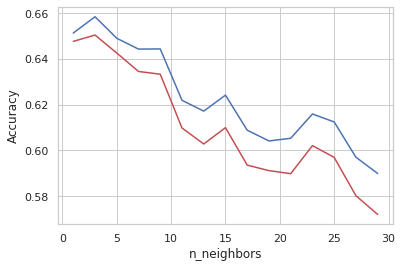

[0.651358543417367, 0.6584733893557424, 0.6490616246498601, 0.644327731092437, 0.6443977591036415, 0.6219327731092438, 0.6171988795518207, 0.624187675070028, 0.6088515406162466, 0.6041596638655461, 0.6053221288515406, 0.6159523809523808, 0.6124649859943977, 0.5970448179271709, 0.5899299719887955]


In [16]:
#KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
#Even number of classes so only keep odd 
neighbors = [i for i in range(1,30,2)]
# empty list that will hold cv scores
acc_scores = []
f1_scores = []
for k in neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_acc = cross_val_score(knn_clf, X, y, cv=10)
    knn_f1 = cross_val_score(knn_clf, X, y, cv=10, scoring='f1_macro')
    acc_scores.append(knn_acc.mean())
    f1_scores.append(knn_f1.mean())

line1 = plt.plot(neighbors, acc_scores, 'b')
line2 = plt.plot(neighbors, f1_scores, 'r')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.show()
print(acc_scores)

In [17]:
# determining best k
max_acc = -1
optimal_k = -1

for i in enumerate(acc_scores):
    if i[1] > max_acc:
        max_acc = i[1]
        optimal_k = 2*i[0]+1
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


In [18]:
# για το optimal k παίρνουμε και τα αποτέλεσματα στο test set
knn_clf = KNeighborsClassifier(n_neighbors = optimal_k)
knn_clf.fit(X_train, y_train)
knn_preds = knn_clf.predict(X_test)

print(f"Accuracy: {knn_clf.score(X_test, y_test):.4}")
print(f"F1_score: {f1_score(knn_preds,y_test,average='macro'):.4}")

Accuracy: 0.6339
F1_score: 0.6272


In [19]:
#Logistic Regression
log_reg = LogisticRegression(max_iter=400)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)

log_reg_acc = log_reg.score(X_test, y_test)
log_reg_f1 = f1_score(log_reg_preds, y_test, average='macro')
print(f"Accurary: {log_reg_acc:.4}")
print(f"F1-score: {log_reg_f1:.4}")

Accurary: 0.752
F1-score: 0.7515


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Σύγκριση Αποτελεσμάτων

Βλέπουμε λοιπόν εποπτικά τα αποτελέσματα και των 4 ταξινομητών οι οποίοι βρίσκονται και σε αύξουσα διάταξη accuracy και f1-score:

|          | Dummy  | Gaussian Naive Bayes | K-Nearest Neighbors | Logistic Regression |
|----------|--------|----------------------|---------------------|---------------------|
| Accuracy | 0.2441 | 0.4134               | 0.6339| 0.752             |
| F1-macro | 0.0981 | 0.3784               | 0.6272              | 0.7515              | 

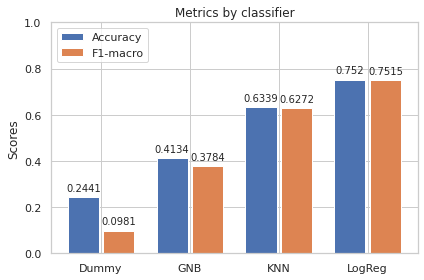

In [21]:
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
import matplotlib 
labels = ['Dummy','GNB','KNN','LogReg']
acc = [0.2441,0.4134,0.6339,0.752]
f1 = [0.0981,0.3784,0.6272,0.7515]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
gap = 0.4 
fig, ax = plt.subplots()
rects1 = ax.bar(x - gap/2, acc, width, label='Accuracy')
rects2 = ax.bar(x + gap/2, f1, width, label='F1-macro')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Metrics by classifier')
plt.xticks(x, labels)
ax.legend(loc='upper left')
ax.bar_label(rects1, padding=4)
ax.bar_label(rects2, padding=4)
ax.set_ylim([0.0, 1])
fig.tight_layout()

plt.show()

# Βελτιστοποίηση

Για τη βελτίωση των αποτελεσμάτων θα προχωρήσουμε σε προ-επεξεργασία των δεδομένων μας και σε μια "έξυπνη" εύρεση των καλύτερων παραμέτρων για τα μοντέλα μας.
Συγκεκριμένα θα ορίσουμε ένα Pipeline για την επεξεργασία των δεδομένων και GridSearchCV για να βελτιστοποιήσουμε τις υπερπαραμέτρους μας. Η GridSearchCV κάνει μαζί cross-validation και grid search.<br>
Η επιλογή των συγκεκριμένων μετραβλητών για το GridSearch έγινε μετά δοκιμαστικούς ελέγχους.

## Dummy

In [22]:
import warnings
warnings.filterwarnings('ignore')

scaler = StandardScaler()
pca = PCA()
n_components = [1,5,7,9,12,15,18]
strategy = ["most_frequent", "prior", "stratified", "uniform", "constant"]
dummy = DummyClassifier()

pipe = Pipeline(steps=[('scaler', scaler),('pca', pca), ('dummy', dummy)])
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, dummy__strategy=strategy), cv=10, n_jobs=-1)

import time
start_time = time.time()
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time),"\n")

print(f"Accuracy: {estimator.score(X_test, y_test):.4}")
print(f"F1_score: {f1_score(preds,y_test,average='macro'):.4}")

print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 2.7438042163848877 seconds 

Accuracy: 0.2559
F1_score: 0.2412
{'dummy__strategy': 'uniform', 'pca__n_components': 1}


## Gaussian Naive Bayes

In [23]:
gnb = GaussianNB()
params_NB = np.logspace(0,-9, num=100)

pipe = Pipeline(steps=[('scaler', scaler),('pca', pca), ('gnb', gnb)])
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, gnb__var_smoothing=params_NB), cv=10, n_jobs=-1)

import time
start_time = time.time()
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time),"\n")

print(f"Accuracy: {estimator.score(X_test, y_test):.4}")
print(f"F1_score: {f1_score(preds,y_test,average='macro'):.4}")

print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 29.323825359344482 seconds 

Accuracy: 0.7165
F1_score: 0.7285
{'gnb__var_smoothing': 5.336699231206313e-06, 'pca__n_components': 18}


## K-Nearest Neighbors

In [24]:
clf = KNeighborsClassifier()
k = [1,3,5,7,9] # η υπερπαράμετρος του ταξινομητή
algorithm = ["auto",  "ball_tree", "kd_tree", "brute"]

pipe = Pipeline(steps=[('scaler', scaler),('pca', pca), ('kNN', clf)])
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, kNN__n_neighbors=k, kNN__algorithm=algorithm), cv=10, scoring="accuracy",n_jobs=-1)

import time
start_time = time.time()
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time),"\n")

print(f"Accuracy: {estimator.score(X_test, y_test):.4}")
print(f"F1_score: {f1_score(preds,y_test,average='macro'):.4}")

print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 9.428291320800781 seconds 

Accuracy: 0.6969
F1_score: 0.6988
{'kNN__algorithm': 'auto', 'kNN__n_neighbors': 1, 'pca__n_components': 15}


## Logistic Regression

In [25]:
clf = LogisticRegression()
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
    
pipe = Pipeline(steps=[('scaler', scaler),('pca', pca), ('lr', clf)])
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, lr__C=C, lr__penalty=penalty), cv=10, n_jobs=-1)

import time
start_time = time.time()
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time),"\n")

print(f"Accuracy: {estimator.score(X_test, y_test):.4}")
print(f"F1_score: {f1_score(preds,y_test,average='macro'):.4}")

print(estimator.best_params_)

Συνολικός χρόνος fit και predict: 131.30688571929932 seconds 

Accuracy: 0.7638
F1_score: 0.7713
{'lr__C': 494.1713361323828, 'lr__penalty': 'l2', 'pca__n_components': 18}


## Σύνοψη

Τελικά, όπως προκύπτει και απο το παρακάτω διάγραμμα, παρατηρούμε πως μετά από τις απαραίτητες βελτιστοποιήσεις που κάνουμε το accuracy αλλά και το F1-macro αυξάνονται, σε άλλα αρκετά (GNB) και σε άλλα λιγότερα(LogRef, kNN) .

|          | Dummy  | Gaussian Naive Bayes | K-Nearest Neighbors | Logistic Regression |
|----------|--------|----------------------|---------------------|---------------------|
| Accuracy | 0.2559 | 0.7165               | 0.6969              | 0.8071              |
| F1-macro | 0.2412 | 0.7285               | 0.6988              | 0.8039              | 

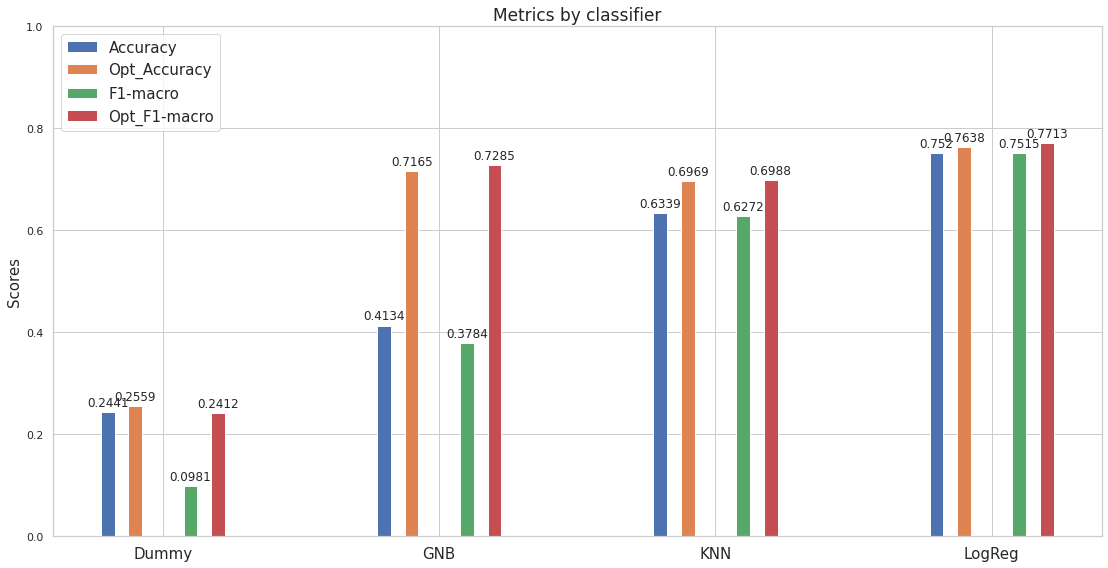

In [26]:
labels = ['Dummy','GNB','KNN','LogReg']
font=20
acc = [0.2441,0.4134,0.6339,0.752]
f1 = [0.0981,0.3784,0.6272,0.7515]
x = np.arange(len(labels))  # the label locations
width = 0.05  # the width of the bars
gap = 0.1
acc2 = [0.2559,0.7165,0.6969,0.7638]
f12 = [0.2412,0.7285,0.6988,0.7713]
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 8)
rects1 = ax.bar(x - 2*gap, acc, width, label='Accuracy')
rects12 = ax.bar(x - gap, acc2, width, label='Opt_Accuracy')
rects2 = ax.bar(x + gap, f1, width, label='F1-macro')
rects22 = ax.bar(x + 2*gap, f12, width, label='Opt_F1-macro')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores', fontsize=15)
ax.set_title('Metrics by classifier', fontsize=17)
plt.xticks(x, labels, fontsize=15)
ax.legend(loc='upper left', fontsize=15)
ax.set_ylim([0.0, 1])

ax.bar_label(rects1, padding=3, fontsize=12)
ax.bar_label(rects2, padding=3, fontsize=12)
ax.bar_label(rects12, padding=3, fontsize=12)
ax.bar_label(rects22, padding=3, fontsize=12)
fig.tight_layout()
plt.show()